# DSC 540-Week 5 & 6 Exercises
# Kannur, Gyan

## Data Wrangling with Python: Activity 5.01

### create a soup with bs4 and load the data 

In [12]:
## loading the required packages
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [13]:
## Reading the html file
fd = open('./datasets/countries_gdp.htm', 'r', encoding="utf-8")
soup = BeautifulSoup(fd)
fd.close()

In [14]:
## Fetch all tables using the 'table' tag
all_tables = soup.find_all('table')
count=len(all_tables)
print(f"Total number of tables {count}")

Total number of tables 9


In [16]:
## Using the class attribute to find the right table
data_table = soup.find("table", {"class": '"wikitable"|}'})
## this prints data type of the returned object
dp=type(data_table) 
print(f"data type of the returned object : {dp} ")

data type of the returned object : <class 'bs4.element.Tag'> 


In [20]:
## Separating the source names and their corresponding data
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
### This shows data is from three sources
print(len(sources_list))


3


In [21]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)
## type of the actual data
type(data) 

bs4.element.ResultSet

In [31]:
## Get the source names from the list of sources you have created
data_tables = []
[data_tables.append(td.findAll('table')) for td in data]
len(data_tables)
  

3

## Separating the header and data from the data for the first source only

In [32]:
# extracting source names with the help of getText() by passing the values from sources_list in a loop
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [34]:
## Extracting the column headers for the data
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [76]:
## Extracting the actual data from the first source
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]


In [78]:
### Removing the tags to remain with the actual observations by passing the values from "rows1" derived from above step
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
data_rows1[10]


['11', 'South Korea', '1,538,030']

In [38]:
## Creating the data frame from the observations  and headers from the first column
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [39]:
## Extracting the column header for the data from the second source
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [79]:
### Extracting the observations with all elements and attributes from the second data source
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
rows2[1]

<tr style="background-color:#eaecf0">
<td align="right" data-sort-value="0"> </td>
<td><i><span class="flagicon"><img alt="" class="thumbborder" data-file-height="540" data-file-width="810" height="15" src="./List of countries by GDP (nominal) - Wikipedia_files/23px-Flag_of_Europe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/35px-Flag_of_Europe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/45px-Flag_of_Europe.svg.png 2x" width="23"/> </span><a href="https://en.wikipedia.org/wiki/European_Union" title="European Union">European Union</a></i><sup class="reference" id="cite_ref-26"><a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-26">[23]</a></sup></td>
<td align="right"><span class="sortkey" style="display:none">7007172776980000000♠</span>17,277,698
</td></tr>

In [41]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find('♠')
        return td.text[index+1:].strip()

In [42]:
### Extracting only the useful data from the above row information to be used in creating the data frame
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [43]:
### Combining the column headers and the row observations to form the second data frame
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [44]:
## Extracting the column headers from the third source
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [45]:
## Extracting the row information from the third source
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [46]:
## Extracting the row information from row3 
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows3]

In [47]:
## Creating a data frame using the column headers and the row informartion (observations)
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


# Data Wrangling with Python: Activity 6.0

## Load data from Comma Delimited Data (CSV)

In [58]:
## loading the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
## Read csv using pandas
visitors_data= pd.read_csv('./datasets/visit_data.csv')
## show the first five observations of the dataset
visitors_data.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [52]:
#Number of duplicates in each field
## Try to find duplicates in the columns first_name, last_name, email and ip_address using duplicated method
## value_counts() provides the counts of duplicate values in a given column.
## using the filter to check the True values (indicated with 1) returned from duplicated() function, to identify counts.

print('Number of duplicates in the First Name field: {}'.format(visitors_data.first_name.duplicated().sum()))
print('Number of duplicates in the Last Name field: {}'.format(visitors_data.last_name.duplicated().sum()))

print('Number of duplicates in the Email field: {}'.format(visitors_data.email.duplicated().sum()))
print('Number of duplicates in the IP Address field: {}'.format(visitors_data.ip_address.duplicated().sum()))

Number of duplicates in the First Name field: 320
Number of duplicates in the Last Name field: 299
Number of duplicates in the Email field: 0
Number of duplicates in the IP Address field: 0


In [53]:
# Number of duplicate rows

print('Number of duplicates rows present in the dataset: {}'.format(visitors_data.duplicated().sum()))

Number of duplicates rows present in the dataset: 0


In [54]:
### Checking whether there are any NAN in essential 
visit = visitors_data.visit.isnull().values.any()
email = visitors_data.email.isnull().values.any()
ip_address = visitors_data.ip_address.isnull().values.any()
print("The column Email contains NaN - {}".format(email))
print("The column IP Address contains NaN - {}".format(ip_address))
print("The column Visit contains NaN - {}".format(visit))
## Only visits has NAN

The column Email contains NaN - False
The column IP Address contains NaN - False
The column Visit contains NaN - True


In [55]:
## Eliminating Outliers:: We consider the NaN in Visits as the outliers

New_visitors_df = visitors_data[np.isfinite(visitors_data['visit'])] 
New_visitors_df.head()


,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [56]:
# reporting size difference
### before and after removing the outliers
df_size_before = visitors_data.shape[0]
df_size_after = New_visitors_df.shape[0]
print("The size of previous data was - {} rows".format(df_size_before))
print("The size of the new data is - {} rows".format(df_size_after))


The size of previous data was - 1000 rows
The size of the new data is - 974 rows


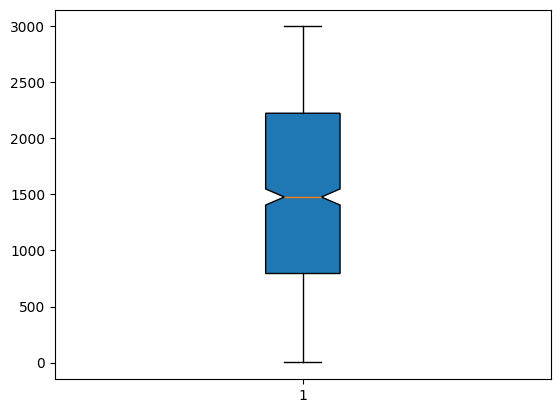

In [59]:
## Boxplot for checking outliers
bp=plt.boxplot(New_visitors_df.visit, patch_artist = True,
                notch ='True', vert = 1)


In [68]:
from scipy import stats
cos_arr_z_score = stats.zscore(New_visitors_df.visit)

In [69]:
#Any data point with a z-score greater than +3 or less then -3 is considered an outlier
#Creating dataframe with zscore filter conditions
cos_arr_without_outliers = New_visitors_df[(cos_arr_z_score < 3)]

In [70]:
# Identifying the shape of dataframe to see if any record has been filtered out as part of outliers
#Using zscore method, we could see that there is no outliers to be filtered out in the data
cos_arr_without_outliers.shape

(974, 7)

##### Alternative method for outliers

In [74]:
## We will look to use minimum value of 150 and maximum value of 2900 as our potential valid range of values for visit column.
## any other values outside this range will be considered as potential outliers for this exercise.

cleaned_visit_df = New_visitors_df[(New_visitors_df.visit >= 150) & (New_visitors_df.visit <= 2900)]

In [75]:
## shape function provides the number of rows and columns information
cleaned_visit_df.shape

(907, 7)

Looking at above, with certain assumption about potential outlier values (as values below 150 and values above 2900 considered as outliers), we can see that the clean dataframe has 907 rows in it

# 3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [61]:
## load the sql library
import sqlite3

In [62]:
# making a connection to sql lite db 

con = sqlite3.connect('./datasets/mydata.sqlite')

#defining DDL query 

query = "CREATE TABLE UserDataTable (Name VARCHAR(50), Address VARCHAR(500),City VARCHAR(50), State VARCHAR(50),PhoneNumber VARCHAR(50),Zip INTEGER);"

#execute the query to create the table 

con.execute(query)

con.commit()



In [63]:
# Add data into table 

data = [('James Butt', '6649 N Blue Gum St', 'New Orleans', 'LA', 70116, '504-621-8927'), ('Josephine Darakjy','4 B Blue Ridge Blvd','Brighton','MI',48116,'810-292-9388'), ('Art Venere','8 W Cerritos Ave␣ , #54','Bridgeport','NJ',8014,'856-636-8749'),  ('Lenna Paprocki','639 Main St','Anchorage','AK',99501,'907-385-4412'), ('Donette Foller','34 Center St','Hamilton','OH',45011,'513-570-1893'), ('Simona Morasca','3 Mcauley Dr','Ashland','OH',44805,'419-503-2484'), ('Mitsue Tollner','7 Eads St','Chicago','IL',60632,'773-573-6914'), ('Leota Dilliard','7 W Jackson Blvd','San␣ , Jose','CA',95111,'408-752-3500'), ('Sage Wieser','5 Boston Ave #88','Sioux ,  Falls','SD',57105,'605-414-2147'), ('Kris Marrier','228 Runamuck Pl , #2808','Baltimore','MD',21224,'410-655-8723')]

stmt = "INSERT INTO UserDataTable VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(stmt, data)
#Dont forget to commit your transaction
con.commit()

In [64]:
## import the pandas data frame
import pandas as pd

In [65]:
stm='select * from UserDataTable'

In [66]:
cursor = con.execute(stm)
rows = cursor.fetchall()
rows[1]

('Josephine Darakjy',
 '4 B Blue Ridge Blvd',
 'Brighton',
 'MI',
 '48116',
 '810-292-9388')

In [67]:
## sql query for selecting all the columns data
pd.read_sql_query(stm, con)

,Name,Address,City,State,PhoneNumber,Zip
0,James Butt,6649 N Blue Gum St,New Orleans,LA,70116,504-621-8927
1,Josephine Darakjy,4 B Blue Ridge Blvd,Brighton,MI,48116,810-292-9388
2,Art Venere,"8 W Cerritos Ave␣ , #54",Bridgeport,NJ,8014,856-636-8749
3,Lenna Paprocki,639 Main St,Anchorage,AK,99501,907-385-4412
4,Donette Foller,34 Center St,Hamilton,OH,45011,513-570-1893
5,Simona Morasca,3 Mcauley Dr,Ashland,OH,44805,419-503-2484
6,Mitsue Tollner,7 Eads St,Chicago,IL,60632,773-573-6914
7,Leota Dilliard,7 W Jackson Blvd,"San␣ , Jose",CA,95111,408-752-3500
8,Sage Wieser,5 Boston Ave #88,"Sioux , Falls",SD,57105,605-414-2147
9,Kris Marrier,"228 Runamuck Pl , #2808",Baltimore,MD,21224,410-655-8723
